<a href="https://colab.research.google.com/github/marioyeahdude/marioyeahdude/blob/main/PROFECO_Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Bureau Complaints (PROFECO) <img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic">

**Project Objective:**
Analyze the behavior of complaints registered with the PROFECO Business Bureau in order to identify temporal trends, geographic concentration of complaints, and suppliers with the highest number of complaints.

---

# Quejas del Buró Comercial (PROFECO) <img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic">

**Objetivo del proyecto:**
Analizar el comportamiento de las quejas registradas en el Buró Comercial de PROFECO para identificar tendencias temporales, concentración geográfica de las quejas y los proveedores con mayor número de reclamaciones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("drive/MyDrive/buro_comercial_2019_2025.csv")

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   expediente          541909 non-null  object
 1   fecha_ingreso       541909 non-null  object
 2   anio_creacion       541909 non-null  int64 
 3   estado_procesal     541909 non-null  object
 4   razon_social        541909 non-null  object
 5   nombre_comercial    541909 non-null  object
 6   giro                541909 non-null  object
 7   sector              541909 non-null  object
 8   area_responsable    541909 non-null  object
 9   estado              541909 non-null  object
 10  motivo_reclamacion  541909 non-null  object
dtypes: int64(1), object(10)
memory usage: 45.5+ MB


,expediente,fecha_ingreso,anio_creacion,estado_procesal,razon_social,nombre_comercial,giro,sector,area_responsable,estado,motivo_reclamacion
0,PFC.BCN.B.3/000001-2019,2019/01/02,2019,Desistimiento,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Metropolitana de Tijuana,Baja California,Cancelación de Vuelo
1,PFC.PDF.B.3/000007-2019,2019/01/02,2019,Desistimiento,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Metropolitana Cdmx-poniente,Ciudad de México,Daño o Extravio de Equipaje
2,PFC.TAM.B.3/000002-2019,2019/01/02,2019,Desistimiento,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Golfo-norte,Tamaulipas,Cancelación de Vuelo
3,PFC.TAB.B.3/000004-2019,2019/01/02,2019,No Conciliada,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Golfo-sur,Tabasco,Cancelación de Vuelo
4,PFC.GTO.B.3/000008-2019,2019/01/02,2019,Desistimiento,"Administracion Integral de Alimentos, S.A. de ...","Administracion Integral de Alimentos, S.A. de ...",Tienda Departamental,Tienda Departamental,Zona del Bajío,Guanajuato,Negativa a la Entrega del Producto o Servicio


<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> The dataset contains records of complaints with PROFECO in Mexico by **date**, **procedural status**, and **business type, sector, and name**.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> El dataset contiene registros de quejas con la PROFECO en México por **fecha**, **estado procesal** y **giro, sector y nombre de la empresa**.

In [ ]:
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'])
df['mes'] = df['fecha_ingreso'].dt.month

df.head()

,expediente,fecha_ingreso,anio_creacion,estado_procesal,razon_social,nombre_comercial,giro,sector,area_responsable,estado,motivo_reclamacion,mes
0,PFC.BCN.B.3/000001-2019,2019-01-02,2019,Desistimiento,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Metropolitana de Tijuana,Baja California,Cancelación de Vuelo,1
1,PFC.PDF.B.3/000007-2019,2019-01-02,2019,Desistimiento,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Metropolitana Cdmx-poniente,Ciudad de México,Daño o Extravio de Equipaje,1
2,PFC.TAM.B.3/000002-2019,2019-01-02,2019,Desistimiento,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Golfo-norte,Tamaulipas,Cancelación de Vuelo,1
3,PFC.TAB.B.3/000004-2019,2019-01-02,2019,No Conciliada,"Abc Aerolineas, S.A. de C.V.",Interjet,Aerolínea Comercial,Turístico,Zona Golfo-sur,Tabasco,Cancelación de Vuelo,1
4,PFC.GTO.B.3/000008-2019,2019-01-02,2019,Desistimiento,"Administracion Integral de Alimentos, S.A. de ...","Administracion Integral de Alimentos, S.A. de ...",Tienda Departamental,Tienda Departamental,Zona del Bajío,Guanajuato,Negativa a la Entrega del Producto o Servicio,1


In [ ]:
quejas_anuales = (
    df.groupby('anio_creacion')
    .size()
    .reset_index(name='total_quejas')
)

quejas_anuales

,anio_creacion,total_quejas
0,2019,103389
1,2020,66978
2,2021,76020
3,2022,80323
4,2023,84513
5,2024,81636
6,2025,49050


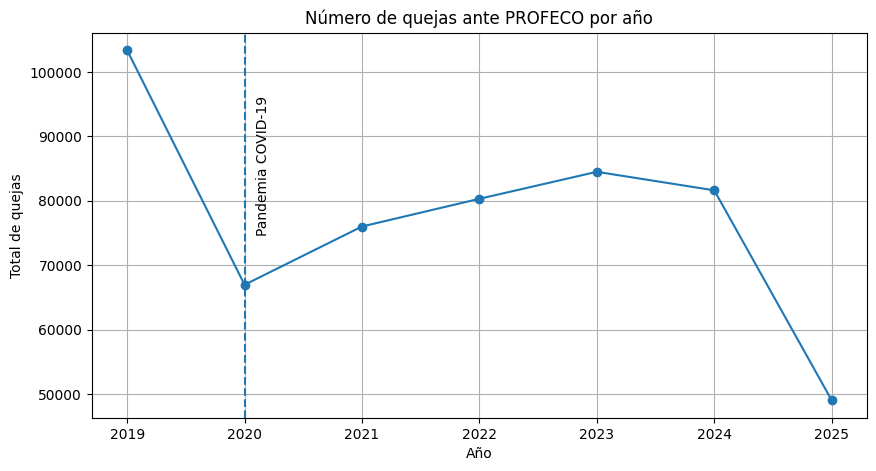

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    quejas_anuales['anio_creacion'],
    quejas_anuales['total_quejas'],
    marker='o'
)

plt.axvline(2020, linestyle='--')
plt.text(2020.1, 75000, 'Pandemia COVID-19', rotation=90)
plt.title('Número de quejas ante PROFECO por año')
plt.xlabel('Año')
plt.ylabel('Total de quejas')
plt.grid(True)
plt.show()

<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> A significant drop is observed in 2020, possibly associated with the decrease in commercial activity during the COVID-19 pandemic.

From 2021 onward, there is a gradual recovery in the number of complaints registered, reaching a peak in 2023. 2025 shows a sharp decline, however, it should be noted that data for the entire year is not available.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> Se observa una caída significativa en 2020, posiblemente asociada a la disminución de actividad comercial durante la pandemia de COVID-19.

A partir de 2021 se presenta una recuperación progresiva en el número
de quejas registradas, alcanzando un punto máximo en 2023. 2025 muestra una gran caída, sin embargo, hay que tomar en cuenta que no se tienen datos de todo el año.

In [ ]:
top_empresas = (
    df.groupby('nombre_comercial')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

top_empresas

,0
nombre_comercial,
Persona Fisica,70698
Cfe,66940
Walmart,26709
Liverpool,11400
Coppel,10509
Mercadolibre,9658
Aeroméxico,8621
Viva Aerobus,6822
Elektra,5699


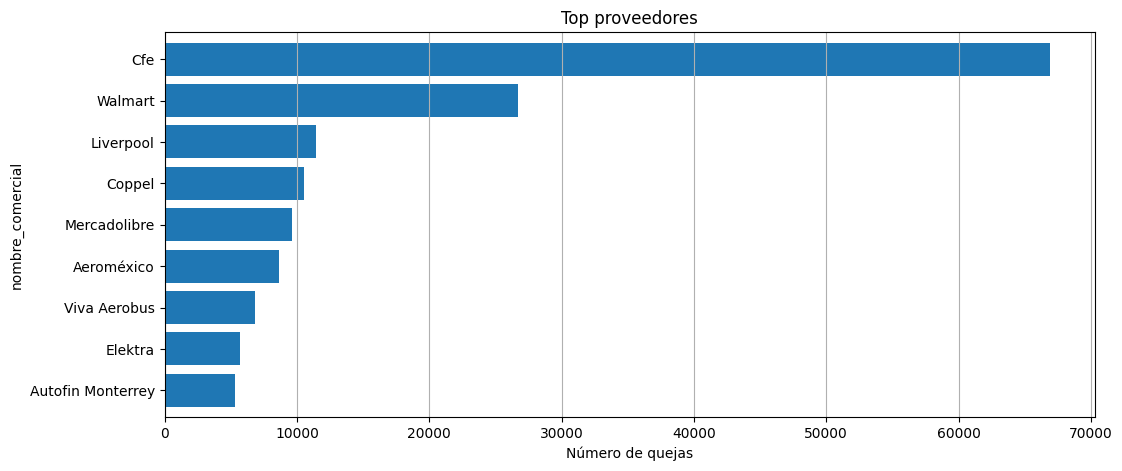

In [ ]:
top_empresas_filtrado = top_empresas.drop('Persona Fisica')

plt.figure(figsize=(12,5))
top_empresas_filtrado.plot(kind='barh', width=0.8)
plt.title('Top proveedores')
plt.xlabel('Número de quejas')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> The analysis shows **Persona Física *(Individuals)*** in first place. This likely refers to individual providers, small businesses, or registrations without a formal business name, thus it can be excluded as they are not considered a single entity.

Following this, utility and retail companies account for a significant proportion of the registered complaints. **CFE** stands out as the provider with the highest volume of complaints, followed by **retail chains**, **digital platforms**, and **airlines**.


---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> El análisis muestra a **Persona Física** en primer lugar. Esto probablemente significa proveedores individuales, pequeños negocios o registros sin nombre comercial formal, por lo que lo excluimos al no ser una sola entidad.

Seguido de éste, empresas de servicios públicos y retail concentran
una proporción significativa de las quejas registradas. **CFE** destaca como el proveedor con mayor volumen de quejas, seguido por **cadenas comerciales**, **plataformas digitales** y **aerolíneas**.

In [ ]:
top_sectores = (
    df.groupby('sector')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

top_sectores

,0
sector,
Electricidad,66940
Turístico,63245
Tienda Departamental,43259
Tiendas de Autoservicio,31490
Automotriz,29221
Compañía de Autofinanciamiento,25398
Ventas por Internet,18791
Taller Mecánico,16378
Inmobiliario,16163


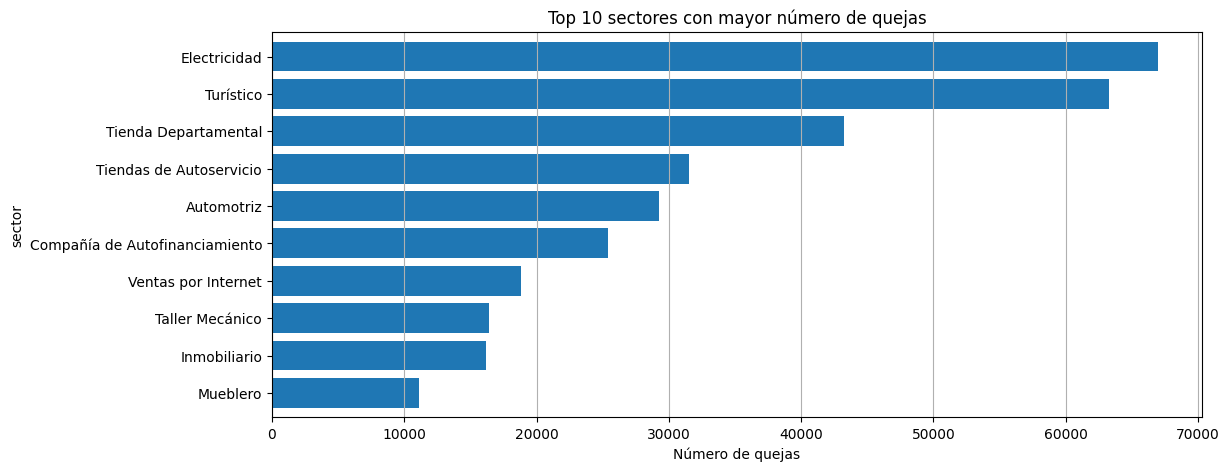

In [ ]:
plt.figure(figsize=(12,5))
top_sectores.plot(kind='barh', width=0.8)
plt.title('Top 10 sectores con mayor número de quejas')
plt.xlabel('Número de quejas')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

In [ ]:
turistico = (
    df[df['sector'] == 'Turístico'].groupby('giro')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

turistico

,0
giro,
Aerolínea Comercial,26994
Agencias de Viajes y Servicios de Reservaciones,21504
Empresas de Tiempo Compartido,10795
Empresa de Autotransporte Federal de Pasajeros,2214
"Hoteles, Moteles y Similares",1738


In [ ]:
departamental = (
    df[df['sector'] == 'Tiendas de Autoservicio'].groupby('nombre_comercial')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

departamental

,0
nombre_comercial,
Walmart,26709
Soriana,1801
Chedraui,1184
Oxxo,685
Costco,348
Waldo´s Dolar Mart,304
"Casa Ley, S.A.P.I. de C.V.",69
"7 Eleven Mexico, S.A. de C.V.",60
"Comercial City Fresko, S. de R.L. de C.V.",48


<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> The **electricity sector** and the **tourism sector** account for the largest volume of registered complaints.

The electricity sector in Mexico is highly regulated, all complaints in this sector are against the same company. In addition to being an essential service, the high volume of complaints may be due to its massive user base.

The tourism sector includes airlines, travel agencies, and vacation services. This sector frequently experiences cancellations, delays, and refunds, making it inherently prone to conflict.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> El **sector eléctrico** y el **sector turístico** concentran el mayor volumen de quejas registradas.

El sector eléctrico en México es altamente regulado, todas las quejas de este sector son de una misma empresa, además de ser un servicio esencial, su volumen alto puede deberse a la base masiva de usuarios.

El sector turístico incluye aerolíneas, agencias de viaje y servicios vacacionales. Este sector suele tener cancelaciones, retrasos y reembolsos, por lo que es naturalmente conflictivo.

In [ ]:
top_estados = df['estado'].value_counts().head(10)

top_estados

,count
estado,
Ciudad de México,156353
Estado de México,56042
Guanajuato,24940
Chihuahua,22424
Jalisco,19016
Veracruz,18944
Yucatán,16978
Querétaro,15866
Morelos,14236


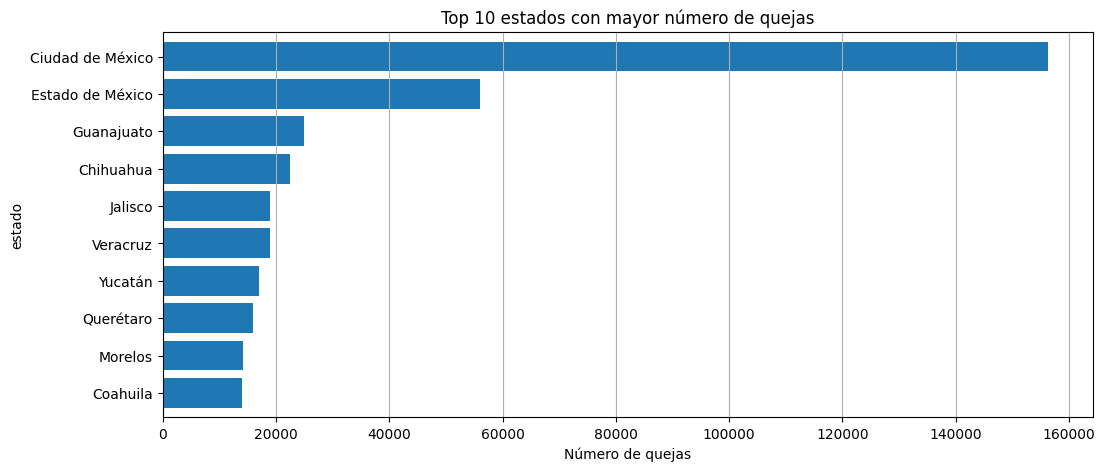

In [ ]:
plt.figure(figsize=(12,5))
top_estados.plot(kind='barh', width=0.8)
plt.title('Top 10 estados con mayor número de quejas')
plt.xlabel('Número de quejas')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> Mexico City has a significantly higher proportion of complaints compared to the rest of the states. However, this result could be due to factors such as population density and commercial activity.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> La Ciudad de México concentra una proporción significativamente mayor
de quejas en comparación con el resto de las entidades. Sin embargo, este resultado podría ser debido a factores como la densidad poblacional y actividad comercial.

In [ ]:
pd.crosstab(df['estado'], df['sector']).head()

sector,0,Acabados de Ceramica,Administrador Aeroportuario,Agencia Aduanal,Agencia de Alquiler de Autobuses,Agencia de Alquiler de Automóvil,Agencia de Colocación de Personal,"Agencia de Investigación, Protección y Seguridad","Agencia de Modelos, Edecanes, Demostradoras y Servicios de Compañía",Agencia de Publicidad,...,Ventas a Consignacion y Comisión,Ventas por Internet,Verdulería,Veterinario,Videoclub /tienda de Renta de Videos y Juegos de Video,Vidrierías,Vivero,Vulcanizadora,Zapatería,Óptica
estado,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,15,0,0,5,8,59,1,14,0,16,...,0,245,0,6,7,11,2,3,42,36
Baja California,2,0,0,59,3,106,1,30,0,10,...,0,67,0,3,2,58,0,0,15,27
Baja California Sur,0,0,0,1,0,15,0,2,0,5,...,0,70,0,1,1,7,0,0,10,14
Campeche,3,0,0,0,4,14,0,4,0,3,...,0,107,0,1,1,1,0,2,7,29
Chiapas,1,0,1,0,2,15,2,3,1,7,...,0,120,0,6,3,5,1,1,10,24


In [ ]:
cero = (
    df[df['sector'] == '0'].groupby('nombre_comercial')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

cero.info()
cero

<class 'pandas.core.series.Series'>
Index: 10 entries, 0 to Game Shifting, S. de R.L. de C.V.
Series name: None
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


,0
nombre_comercial,
0,184
Persona Fisica,21
"Colocadora de Servicios Administrativos Z016, S.A.P.I. de C.V.",4
"Camisas al Punto, S.A. de C.V.",1
"Aster Ems, Sas de Cv",1
Centro de Servicio Grupo Sim-tech,1
"Consorcio Ingenieria Integral, S.A. de C.V.",1
Corporate Cnbrandsoutlets-mxf,1
"Electro Pr Construcciones, S. de R.L. de C.V.",1


In [ ]:
df['sector'] = df['sector'].replace('0', np.nan)
df['sector'] = df['sector'].fillna('No especificado')

In [ ]:
pd.crosstab(df['estado'], df['sector']).head()

sector,Acabados de Ceramica,Administrador Aeroportuario,Agencia Aduanal,Agencia de Alquiler de Autobuses,Agencia de Alquiler de Automóvil,Agencia de Colocación de Personal,"Agencia de Investigación, Protección y Seguridad","Agencia de Modelos, Edecanes, Demostradoras y Servicios de Compañía",Agencia de Publicidad,Agencia y Concesionaria de Motocicletas,...,Ventas a Consignacion y Comisión,Ventas por Internet,Verdulería,Veterinario,Videoclub /tienda de Renta de Videos y Juegos de Video,Vidrierías,Vivero,Vulcanizadora,Zapatería,Óptica
estado,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,0,0,5,8,59,1,14,0,16,99,...,0,245,0,6,7,11,2,3,42,36
Baja California,0,0,59,3,106,1,30,0,10,28,...,0,67,0,3,2,58,0,0,15,27
Baja California Sur,0,0,1,0,15,0,2,0,5,20,...,0,70,0,1,1,7,0,0,10,14
Campeche,0,0,0,4,14,0,4,0,3,185,...,0,107,0,1,1,1,0,2,7,29
Chiapas,0,1,0,2,15,2,3,1,7,68,...,0,120,0,6,3,5,1,1,10,24


In [ ]:
top_sectores = df['sector'].value_counts().head(10).index

df_filtrado = df[df['sector'].isin(top_sectores)]

tabla_top = pd.crosstab(df_filtrado['estado'], df_filtrado['sector'])

tabla_top.head()

sector,Automotriz,Compañía de Autofinanciamiento,Electricidad,Inmobiliario,Mueblero,Taller Mecánico,Tienda Departamental,Tiendas de Autoservicio,Turístico,Ventas por Internet
estado,,,,,,,,,,
Aguascalientes,615,544,100,826,281,452,880,343,1461,245
Baja California,623,753,61,422,78,738,671,175,1149,67
Baja California Sur,305,66,105,220,22,334,276,149,396,70
Campeche,341,357,616,103,37,180,516,259,376,107
Chiapas,429,495,420,84,59,145,611,220,610,120


In [ ]:
tabla_pct = tabla_top.div(tabla_top.sum(axis=1), axis=0) * 100
tabla_pct.head()

sector,Automotriz,Compañía de Autofinanciamiento,Electricidad,Inmobiliario,Mueblero,Taller Mecánico,Tienda Departamental,Tiendas de Autoservicio,Turístico,Ventas por Internet
estado,,,,,,,,,,
Aguascalientes,10.701235,9.465808,1.740038,14.372716,4.889508,7.864973,15.312337,5.968331,25.421959,4.263094
Baja California,13.151784,15.896137,1.287735,8.908592,1.646612,15.579481,14.165083,3.694321,24.255858,1.414397
Baja California Sur,15.697375,3.396809,5.404014,11.322697,1.132270,17.189913,14.204838,7.668554,20.380854,3.602676
Campeche,11.791148,12.344398,21.300138,3.561549,1.279391,6.224066,17.842324,8.955740,13.001383,3.699862
Chiapas,13.435640,15.502662,13.153774,2.630755,1.847792,4.541184,19.135609,6.890072,19.104291,3.758221


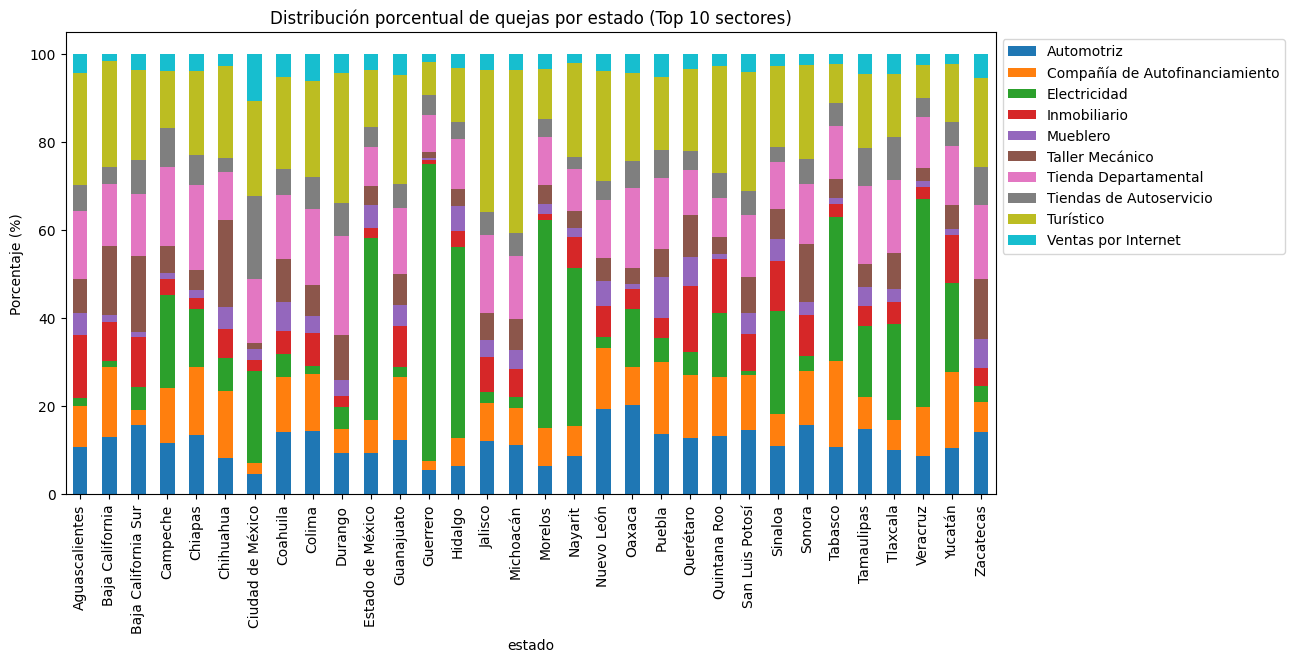

In [ ]:
tabla_pct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribución porcentual de quejas por estado (Top 10 sectores)')
plt.ylabel('Porcentaje (%)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
sector_dominante = tabla_pct.idxmax(axis=1)

sector_dominante.head()

,0
estado,
Aguascalientes,Turístico
Baja California,Turístico
Baja California Sur,Turístico
Campeche,Electricidad
Chiapas,Tienda Departamental


In [ ]:
sector_dominante.value_counts()

,count
Turístico,18
Electricidad,11
Tienda Departamental,2
Automotriz,1


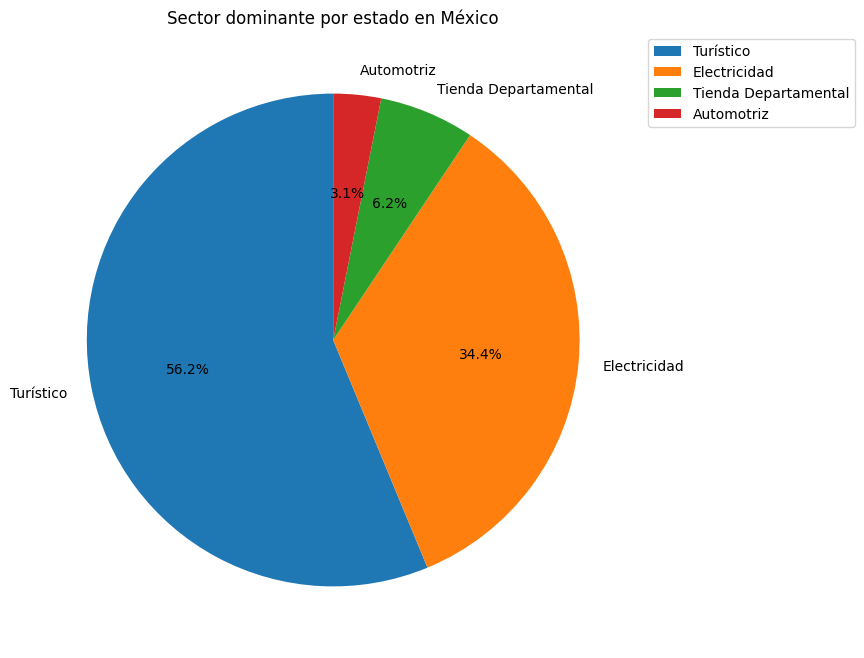

In [ ]:
plt.figure(figsize=(8,8))

sector_dominante.value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Sector dominante por estado en México')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()